# ДЗ №5 по теории вероятностей и мат. статистике 

## 1 шаг -- импорт библиотек

In [619]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 2 шаг -- выберем распределение chi^2 с степенями свободы 3

[0.         0.19716631 0.23467636 0.24190042 0.23508647 0.22120975
 0.20394663 0.18540079 0.16681273 0.14891111]


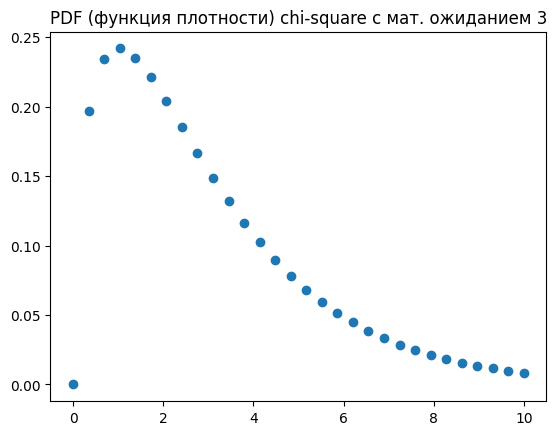

In [620]:
x_chi_1 = np.linspace(0, 10, 30)
chi_square_1 = sts.chi2(df = 3).pdf(x_chi_1)
print(chi_square_1[:10])


chi_square_plot_1 = plt.scatter(x = x_chi_1, y = chi_square_1)
plt.title('PDF (функция плотности) chi-square с мат. ожиданием 3')
plt.show()

## Задание 1 -- Для выбранного распределения сгенерируйте выборки разного объема и проиллюстрируйте сходимость выборочного среднего к математическому ожиданию (покажите наглядно стабилизацию выборочного среднего)

**Доверительный интервал (ДИ)** показывает диапазон значений, в котором с заданной уверенностью (1 − 𝛼), например, с 95%, находится истинный параметр генеральной совокупности (например, среднее, дисперсия и т.д.).

### Выборка размером 20 (маленькая выборка)

[2.2131102152522044, 4.030923792600527, 3.2057854108716937, 2.6317995621589723, 2.991910345157564, 3.0153638767125246, 2.9305425718657143, 3.066604933617557, 3.6727127559186217, 3.4112574411854295]


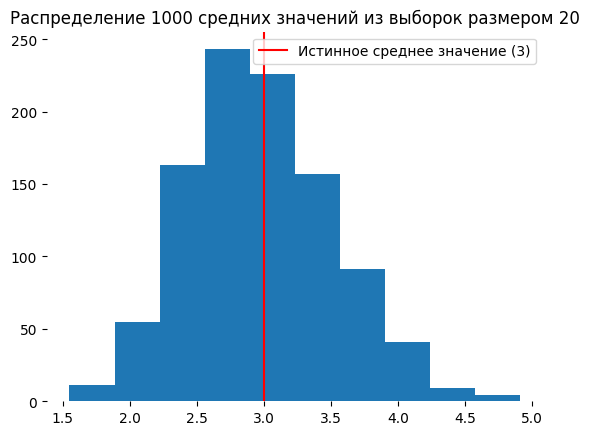

In [621]:
sel_means_1 = []

for i in range(1000):
    mean_i = np.mean(sts.chi2(df = 3).rvs(20))
    sel_means_1.append(mean_i)

print(sel_means_1[:10])
plt.hist(sel_means_1)
plt.axvline(3, label = 'Истинное среднее значение (3)', color = 'red')
plt.title('Распределение 1000 средних значений из выборок размером 20')
plt.box(False)
plt.legend(loc = 'upper right', frameon = True)
plt.show()

### Средняя выборка (размер 200)

[2.8240933763605476, 2.9586370706428564, 3.1111644233335154, 3.2177471712848646, 3.380511891915217, 3.2487307072541953, 3.016916920932882, 2.9982831884218966, 3.099827091282153, 3.278283628765365]


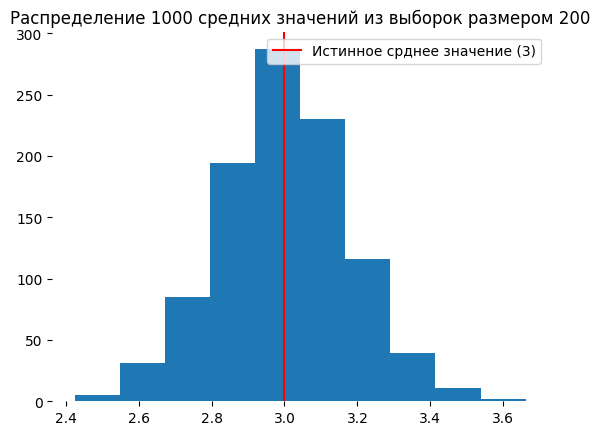

In [622]:
sel_means_2 = []

for i in range(1000):
    mean_i = np.mean(sts.chi2(df=3).rvs(200))
    sel_means_2.append(mean_i)

print(sel_means_2[:10])

plt.hist(sel_means_2)
plt.axvline(3, color = 'red', label = 'Истинное срднее значение (3)')
plt.title('Распределение 1000 средних значений из выборок размером 200')
plt.box(False)
plt.legend(loc='upper right', frameon = True)
plt.show()

### Большая выборка (размер 2000)

[3.0377931612815803, 3.02411610074659, 2.9710489022527056, 2.9441820250625925, 3.034663976539312, 2.990436599587799, 2.985299620602521, 3.0107166516897435, 2.927733915311739, 3.0354952393410373]


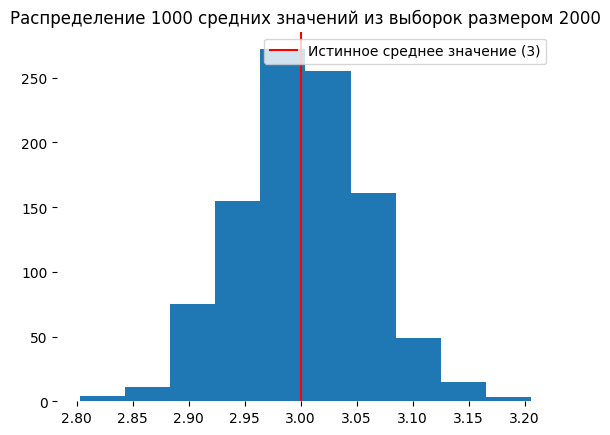

In [623]:
sel_means_3 = []

for i in range(1000):
    mean_i = np.mean(sts.chi2(df = 3).rvs(2000))
    sel_means_3.append(mean_i)

print(sel_means_3[:10])
plt.hist(sel_means_3)
plt.axvline(3, color = 'red', label = 'Истинное среднее значение (3)')
plt.title('Распределение 1000 средних значений из выборок размером 2000')
plt.legend(loc='upper right', frameon = True)
plt.box(False)

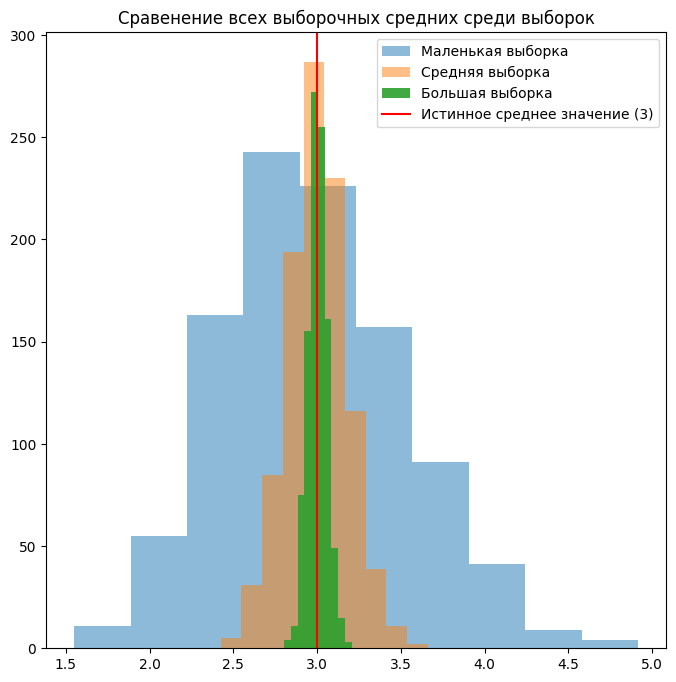

In [624]:
plt.figure(figsize = (8, 8))
plt.hist(sel_means_1, label = 'Маленькая выборка', alpha = 0.5)
plt.hist(sel_means_2, label = 'Средняя выборка', alpha = 0.5)
plt.hist(sel_means_3, label = 'Большая выборка', alpha = 0.9)
plt.axvline(3, color = 'red', label = 'Истинное среднее значение (3)')
plt.legend(loc = 'upper right')
plt.title('Сравенение всех выборочных средних среди выборок')
plt.show()

Таким образом, делаем вывод, что при увеличении размера выборки, выборочное среднее будет все ближе и ближе к истинному мат. ожиданию распределения

## 2 Задание -- Наглядно продемонстрируйте центральную предельную теорему в действии для выбранного вами распределения (покажите сходимость с ростом выборки к нормальному распределению)

Делаем почти все то же самое

### Выборка размером 20 (маленькая выборка)

[3.619915595684229, 2.872023491628534, 3.8185843724634743, 3.4507834949751635, 2.565956275115286, 4.282101594305195, 3.426529008357594, 2.9159591768729056, 2.6840330691466834, 2.9811286295315402]


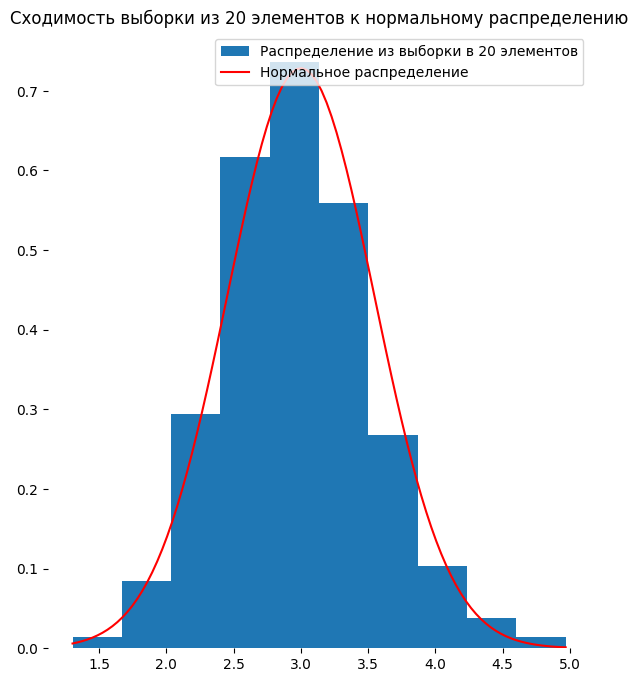

In [625]:

selection_cpt_means_1 = []

for i in range(1000):
    a = np.mean(sts.chi2(df = 3).rvs(20))
    selection_cpt_means_1.append(a)

print(selection_cpt_means_1[:10])

plt.figure(figsize = (7, 8))
plt.title('Сходимость выборки из 20 элементов к нормальному распределению')
plt.hist(selection_cpt_means_1, density = True, label = 'Распределение из выборки в 20 элементов')
norm_rasp = sts.norm(loc = 3, scale = np.sqrt(6 / 20))
x_chi_1 = np.linspace(min(selection_cpt_means_1), max(selection_cpt_means_1), 100)
plt.plot(x_chi_1, norm_rasp.pdf(x_chi_1), color = 'red', label = 'Нормальное распределение')
plt.legend(loc = 'upper right', frameon = True)
plt.box(False)
plt.show()

### Средняя выборка (размер 200)

[2.744925991543856, 3.2779718989066655, 2.9276825862603197, 2.922055710506314, 2.9329109958966857, 2.859874434467987, 3.059814125049795, 3.080306437427578, 3.2497963030877224, 2.9834159285687134]


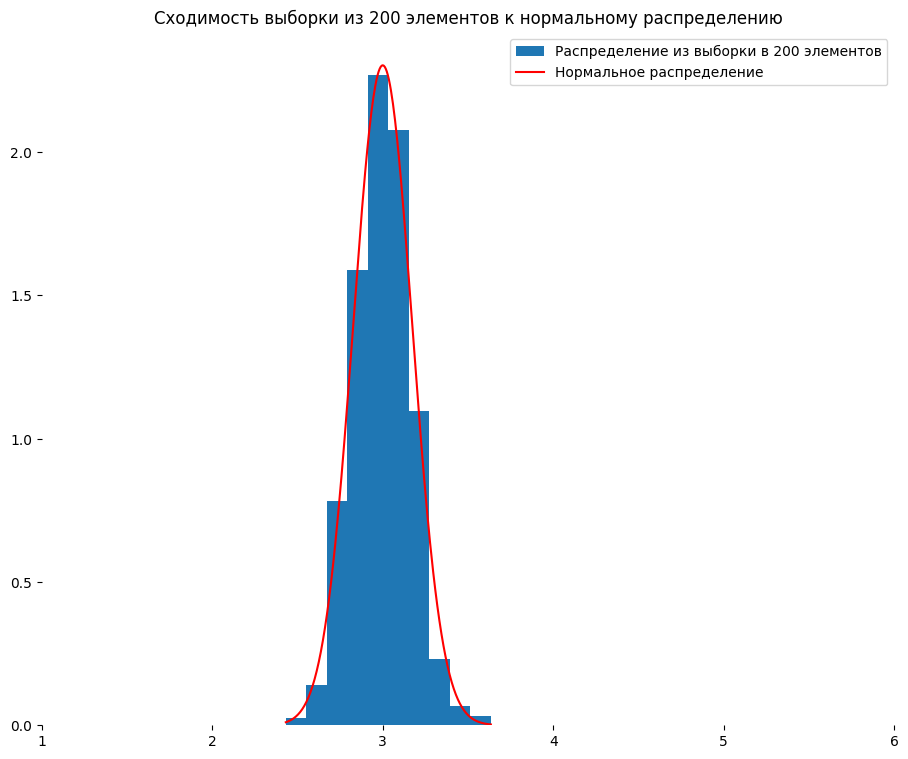

In [626]:
selection_means_cpt_2 = []

for i in range(1000):
    a = np.mean(sts.chi2(df = 3).rvs(200))
    selection_means_cpt_2.append(a)

plt.figure(figsize = (11, 9))
print(selection_means_cpt_2[:10])
plt.title('Сходимость выборки из 200 элементов к нормальному распределению')
plt.hist(selection_means_cpt_2, density = True, label = 'Распределение из выборки в 200 элементов')
norm_rasp = sts.norm(loc = 3, scale = np.sqrt(6 / 200))
x_norm = np.linspace(min(selection_means_cpt_2), max(selection_means_cpt_2), 200)
plt.plot(x_norm, norm_rasp.pdf(x_norm), color = 'red', label = 'Нормальное распределение')
plt.legend(loc = 'upper right', frameon = True)
plt.xlim(1, 6)
plt.box(False)
plt.show()

### Большая выборка (размер 2000)

[3.052579302618594, 3.0583027070214337, 3.111159005529159, 2.9549066903991252, 2.841657570276088, 2.977050841392827, 3.062225334047563, 2.9917792640357495, 3.090319775194077, 2.9992614203289194]


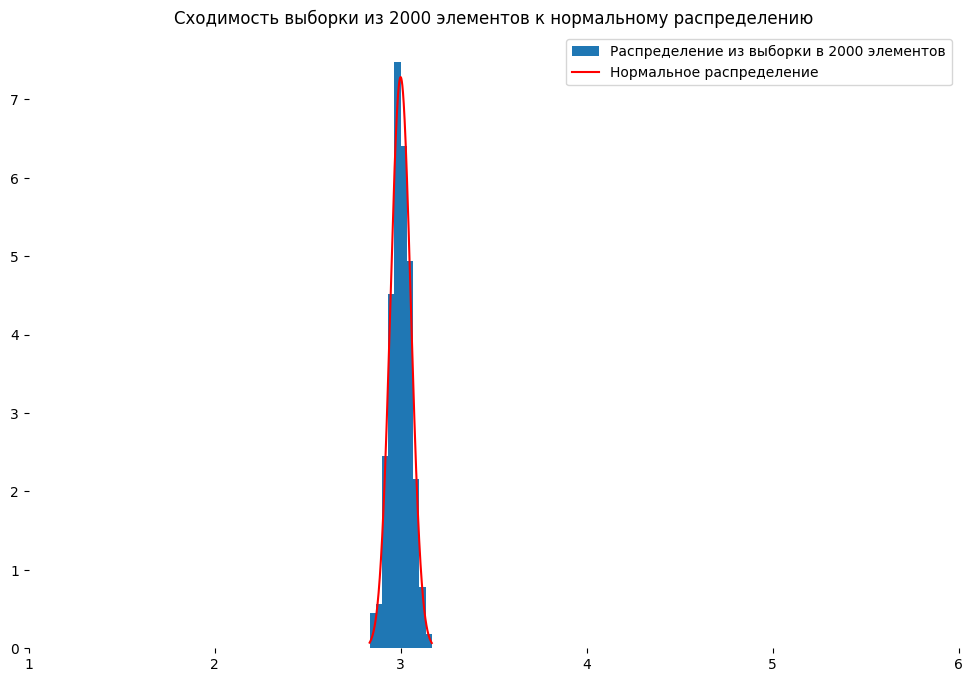

In [627]:
selection_means_cpt_3 = []

for i in range(1000):
    a = np.mean(sts.chi2(df = 3).rvs(2000))
    selection_means_cpt_3.append(a)

print(selection_means_cpt_3[:10])
plt.figure(figsize = (12, 8))
plt.title('Сходимость выборки из 2000 элементов к нормальному распределению')
plt.hist(selection_means_cpt_3, density=True, label = 'Распределение из выборки в 2000 элементов')
x_norm = sts.norm(loc = 3, scale = np.sqrt(6 / 2000))
x_norm_linspace = np.linspace(min(selection_means_cpt_3), max(selection_means_cpt_3), 2000)
plt.plot(x_norm_linspace, x_norm.pdf(x_norm_linspace), color = 'red', label = 'Нормальное распределение')
plt.legend(loc = 'upper right')
plt.xlim(1, 6)
plt.box(False)
plt.show()

## 3 Задание -- Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте асимптотический доверительный интервал для среднего значения на базе ЦПТ

Выборки у нас уже есть, так что просто построим для них доверительный интервал

### Асиптотический 95% довертельный интервал для выборки размером 20

Левая граница 2.7279290459617282, правая граница: 3.2112371516253733


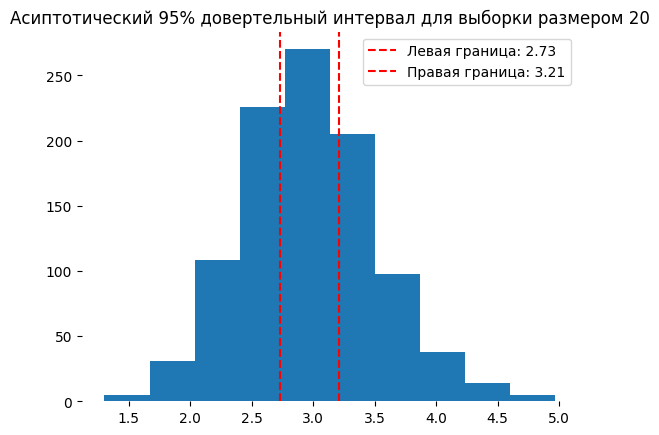

In [628]:
begin_small_asympt, end_small_asympt = sts.norm.interval(0.95, np.mean(selection_cpt_means_1), np.std(selection_cpt_means_1) / np.sqrt(20))

print(f'Левая граница {begin_small_asympt}, правая граница: {end_small_asympt}')

plt.title('Асиптотический 95% довертельный интервал для выборки размером 20')
plt.hist(selection_cpt_means_1)
plt.axvline(begin_small_asympt, color = 'red', linestyle='--', label=f'Левая граница: {begin_small_asympt:.2f}')
plt.axvline(end_small_asympt, color = 'red', linestyle='--', label=f'Правая граница: {end_small_asympt:.2f}')
plt.box()
plt.legend()

### Асиптотический 95% довертельный интервал для выборки размером 200

Левая граница 2.9756565883495627, правая граница: 3.0220319464889185


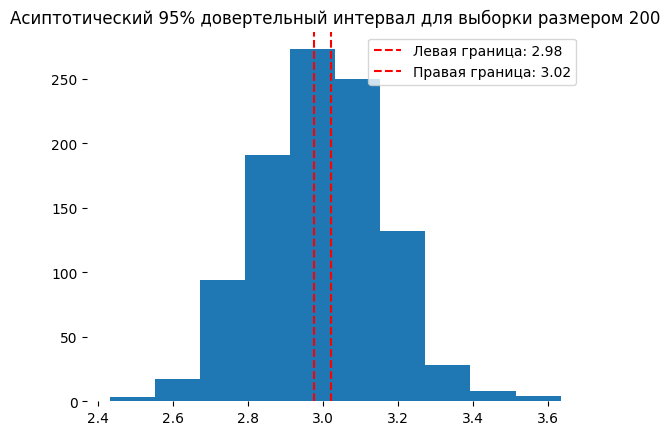

In [629]:
begin_med_asympt, end_med_asympt = sts.norm.interval(0.95, np.mean(selection_means_cpt_2), np.std(selection_means_cpt_2) / np.sqrt(200))

print(f'Левая граница {begin_med_asympt}, правая граница: {end_med_asympt}')

plt.title('Асиптотический 95% довертельный интервал для выборки размером 200')
plt.hist(selection_means_cpt_2)
plt.axvline(begin_med_asympt, color = 'red', linestyle='--', label=f'Левая граница: {begin_med_asympt:.2f}')
plt.axvline(end_med_asympt, color = 'red', linestyle='--', label=f'Правая граница: {end_med_asympt:.2f}')
plt.box(False)
plt.legend()

### Асиптотический 95% довертельный интервал для выборки размером 2000

Левая граница 2.9970454196883702, правая граница: 3.001845944068844


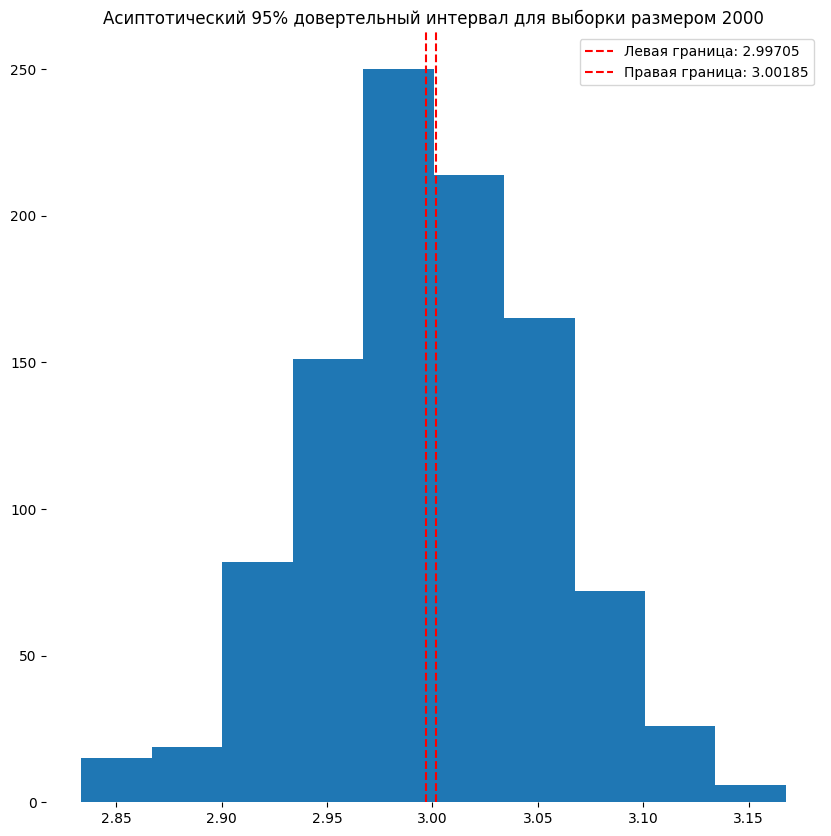

In [630]:
begin_big_asympt, end_big_asympt = sts.norm.interval(0.95, np.mean(selection_means_cpt_3), np.std(selection_means_cpt_3) / np.sqrt(2000))

print(f'Левая граница {begin_big_asympt}, правая граница: {end_big_asympt}')
plt.figure(figsize = (10, 10))
plt.title('Асиптотический 95% довертельный интервал для выборки размером 2000')
plt.hist(selection_means_cpt_3)
plt.axvline(begin_big_asympt, color = 'red', linestyle='--', label=f'Левая граница: {begin_big_asympt:.5f}')
plt.axvline(end_big_asympt, color = 'red', linestyle='--', label=f'Правая граница: {end_big_asympt:.5f}')
plt.box(False)
plt.legend(loc = 'upper right')



## 4 Задание -- Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте точный доверительный интервал для среднего значения (на базе t-критического значения)

\begin{equation}
\left( \bar{X} - t_{\alpha/2, \, n-1} \cdot \frac{s}{\sqrt{n}}, \ \bar{X} + t_{\alpha/2, \, n-1} \cdot \frac{s}{\sqrt{n}} \right)
\end{equation}

где:

  * $\bar{X}$ — выборочное среднее;
  * $t_{\alpha/2, \, n-1}$ — t-критическое значение распределения Стьюдента с $n-1$ степенями свободы для уровня значимости $\alpha$;
  * $s$ — выборочное стандартное отклонение;
  *  $n$ — размер выборки.

### Точный 95% довертельный интервал для выборки размером 20

Левая граница 2.935366599871244, правая граница: 3.0037995977158576


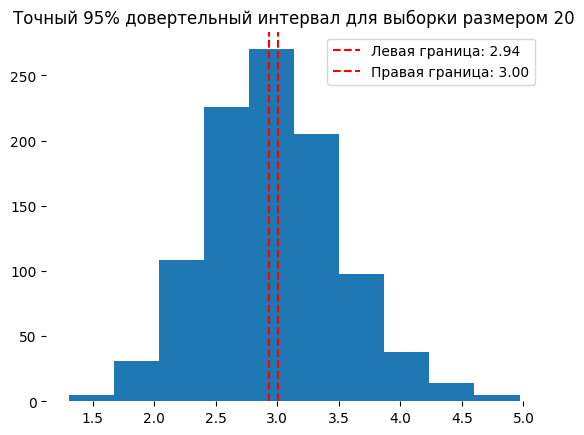

In [631]:
n = len(selection_cpt_means_1)
begin_exact_small, end_exact_small = sts.t.interval(0.95, df = n - 1, loc = np.mean(selection_cpt_means_1), scale = np.std(selection_cpt_means_1) / np.sqrt(len(selection_cpt_means_1)))

print(f'Левая граница {begin_exact_small}, правая граница: {end_exact_small}')

plt.title('Точный 95% довертельный интервал для выборки размером 20')
plt.hist(selection_cpt_means_1)
plt.axvline(begin_exact_small, color = 'red', linestyle='--', label=f'Левая граница: {begin_exact_small:.2f}')
plt.axvline(end_exact_small, color = 'red', linestyle='--', label=f'Правая граница: {end_exact_small:.2f}')
plt.box()
plt.legend()

### Точный 95% довертельный интервал для выборки размером 200

Левая граница 2.9884618432556924, правая граница: 3.0092266915827888


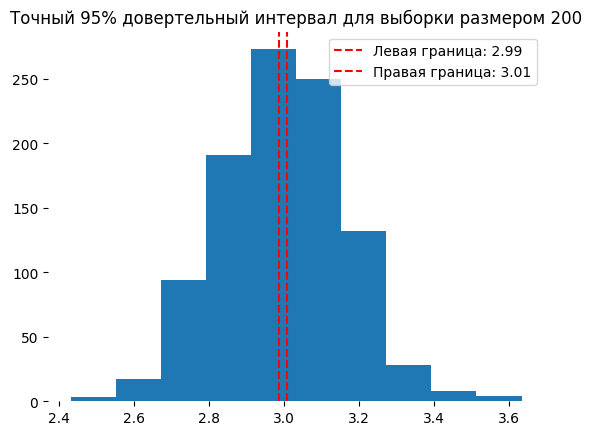

In [632]:
n = len(selection_means_cpt_2)
begin_exact_medium, end_exact_medium = sts.t.interval(0.95,  df = n - 1, loc = np.mean(selection_means_cpt_2), scale = np.std(selection_means_cpt_2) / np.sqrt(len(selection_means_cpt_2)))

print(f'Левая граница {begin_exact_medium}, правая граница: {end_exact_medium}')

plt.title('Точный 95% довертельный интервал для выборки размером 200')
plt.hist(selection_means_cpt_2)
plt.axvline(begin_exact_medium, color = 'red', linestyle='--', label=f'Левая граница: {begin_exact_medium:.2f}')
plt.axvline(end_exact_medium, color = 'red', linestyle='--', label=f'Правая граница: {end_exact_medium:.2f}')
plt.box(False)
plt.legend()

### Точный 95% довертельный интервал для выборки размером 2000

Левая граница 2.996047080957866, правая граница: 3.002844282799348


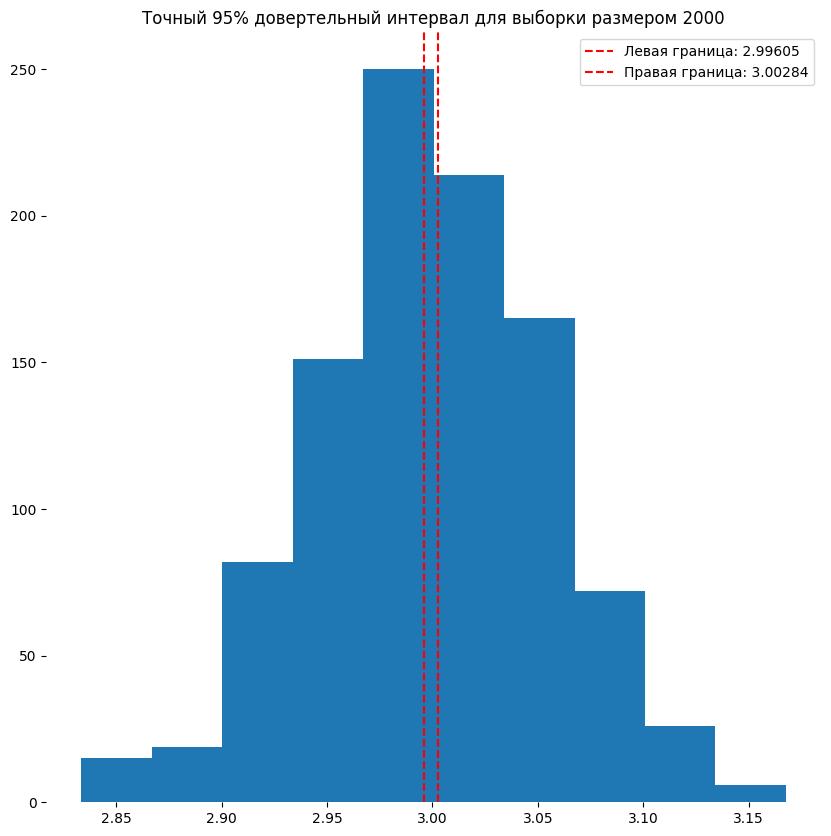

In [633]:
n = len(selection_means_cpt_3)

begin_exact_big, end_exact_big = sts.t.interval(0.95, df = n - 1, loc = np.mean(selection_means_cpt_3), scale = np.std(selection_means_cpt_3) / np.sqrt(len(selection_means_cpt_3)))

print(f'Левая граница {begin_exact_big}, правая граница: {end_exact_big}')
plt.figure(figsize = (10, 10))
plt.title('Точный 95% довертельный интервал для выборки размером 2000')
plt.hist(selection_means_cpt_3)
plt.axvline(begin_exact_big, color = 'red', linestyle='--', label=f'Левая граница: {begin_exact_big:.5f}')
plt.axvline(end_exact_big, color = 'red', linestyle='--', label=f'Правая граница: {end_exact_big:.5f}')
plt.box(False)
plt.legend(loc = 'upper right')


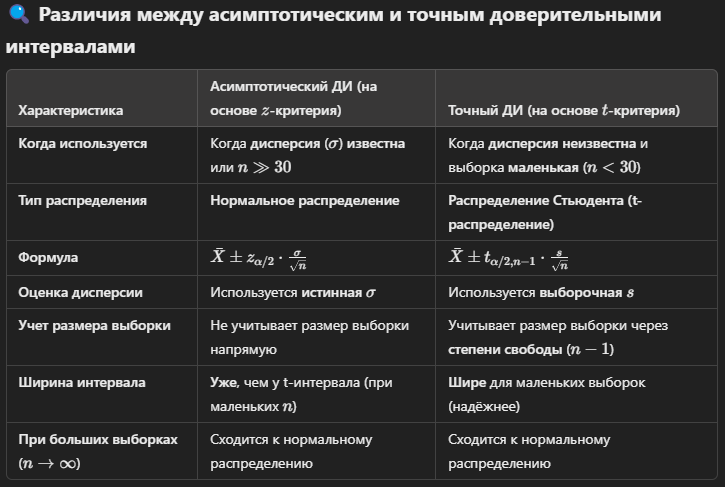
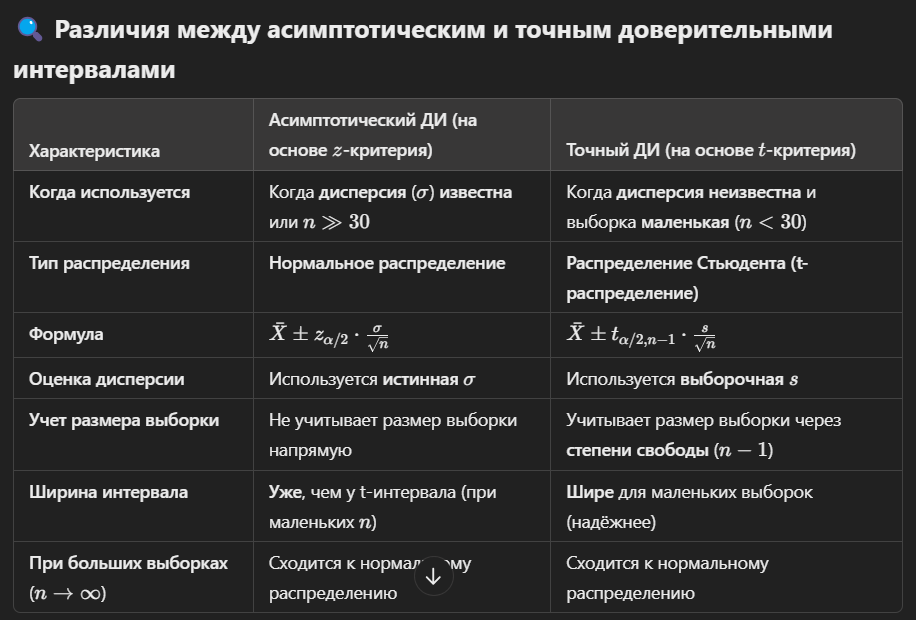

* Асимптотический ДИ — для больших выборок и известной дисперсии.
* Точный ДИ на основе  $𝑡$-распределения — для малых выборок и неизвестной дисперсии.
  
Если сомневаешься, лучше использовать  $𝑡$-интервал — он универсальнее и надёжнее при небольших выборках

## 5 Задание --  Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте эфронов доверительный интервал для среднего, медианы, моды, дисперсии.

**Бутстрап** — это вычислительный статистический метод, который позволяет оценить распределение выборочной статистики (например: медиана, эксцесс, куртозис, среднее значение) путем многократной генерации выборок методом Монте-Карло на основе уже имеющейся выборки

> Проще говоря, бутстрап позволяет «притворяться» генеральной совокупностью, многократно создавая «псевдовыборки» из исходной выборки с возвращением

**Бутстрап-выборка** — это псевдовыборка с повторениями, извлеченная из исходной выборки, то есть в бутстрап-выборке может попасться несколько раз одно и то же наблюдение из исходной выборки. Более того, бутстрап-выборка должна быть равной по объему исходной выборке

Фактически, когда мы используем бутстрап, мы хотим по имеющейся выборке сделать выводы об определенной статистике в генеральной совокупности. Мы много раз извлекаем из исходной выборки бутстрап-выборки, считаем по ним статистику, строим ее распределение, считаем доверительный интервал и делаем выводы относительно него. Ну или можем просто взять, например, среднее или медианное значение, чтобы получить точечную оценку

**Эфронов (Bootstrap) доверительный интервал** — это метод построения доверительных интервалов с помощью повторной выборки. Он особенно полезен для оценки характеристик, для которых нет точных распределений (например, медианы или моды)


**Перцентиль** — это значение в упорядоченном наборе данных, ниже которого находится определённый процент наблюдений

Проще говоря, перцентиль показывает, **насколько высоко или низко располагается определённое значение относительно остальных данных**

Если ты берёшь **5-й перцентиль**, это означает, что **5% данных лежат ниже этого значения**, а **остальные 95% — выше**. Перцентили помогают понять, как распределены данные и где находятся крайние или центральные значения

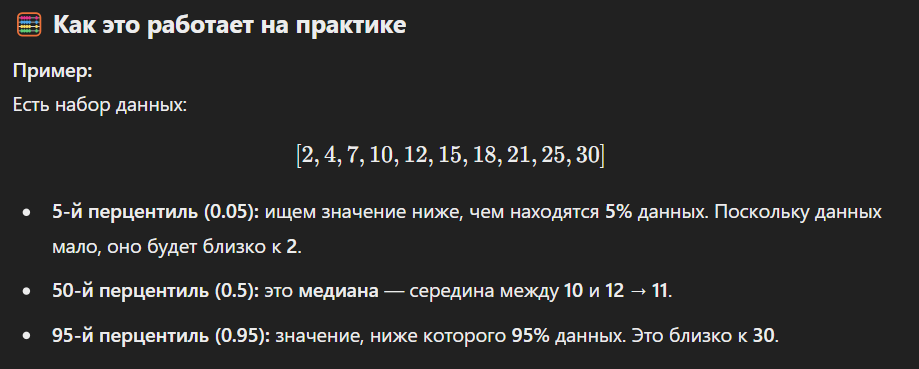

In [634]:
data = sts.chi2(df= 3).rvs(100)

n = len(data)
B = 1000
boot_samples = np.random.choice(data, (B, n))

mean_samples = []
median_samples = []
mode_samples = []
dispersion_samples = []

for i in boot_samples:
    mean_samples.append(np.mean(i))
    median_samples.append(np.median(i))
    mode_samples.append(sts.mode(i)[0])
    dispersion_samples.append(np.var(i))

print(mean_samples[:10])
print(median_samples[:10])
print(mode_samples[:10])
print(dispersion_samples[:10])

[3.3516565029517182, 2.8229940917066743, 3.4665552923037977, 3.3460252837277284, 3.3305218765094766, 3.2634817382708854, 3.5885795247575567, 3.3665483564692575, 3.7511132100506894, 3.6822620860438904]
[2.772274401780704, 2.3118458296797324, 2.7070487762865714, 2.7070487762865714, 2.920890297145081, 2.876661230411933, 2.9693100825379997, 2.6588311853157487, 2.8812914796748417, 2.7070487762865714]
[4.0469715428702555, 4.959852405837229, 0.1145584960566308, 0.44994636856614, 3.8384823931640257, 5.2655966865083625, 7.329407706609286, 3.3535999388946367, 0.44994636856614, 5.916996534421913]
[6.863734193762457, 5.390015077193458, 9.50621462659132, 9.753904944617739, 6.313191085189813, 6.3355927706332045, 8.23781262189452, 8.122748837515358, 10.44013357684413, 9.480363971339342]


### Построение 95 % доверительного интервала для среднего значения

Левая граница доверительного интервала 2.8854535983597756
Правая граница доверительного интервала 3.9949329140728835


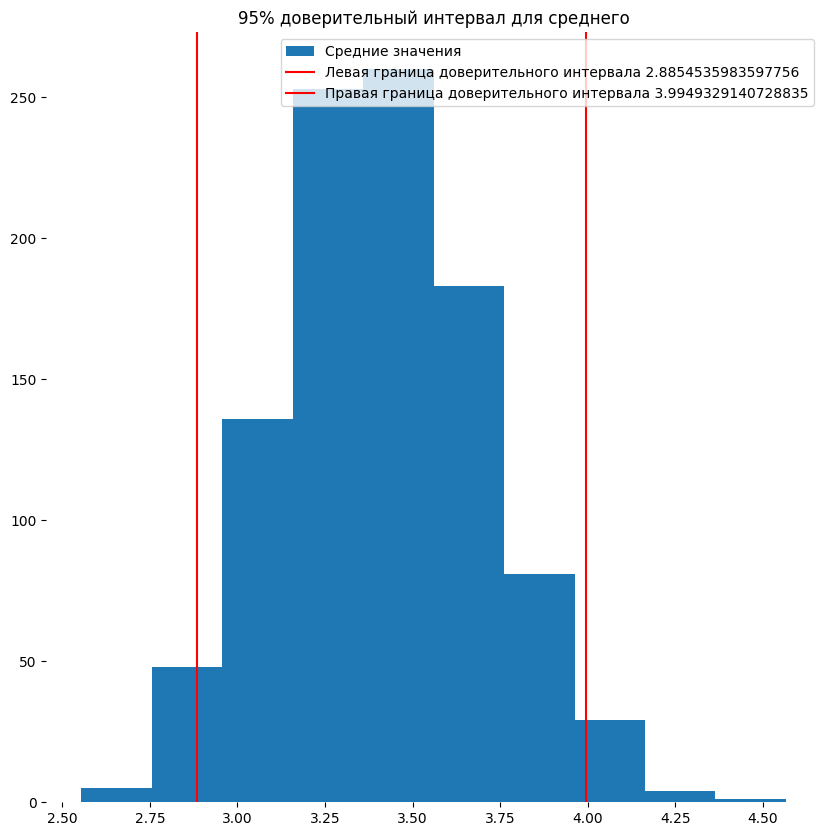

In [635]:
plt.figure(figsize = (10, 10))
plt.hist(mean_samples, label = 'Средние значения')
plt.title('95% доверительный интервал для среднего')
left_line_medium = np.percentile(mean_samples, 2.5)
right_line_medium = np.percentile(mean_samples, 97.5)
print(f'Левая граница доверительного интервала {left_line_medium}')
print(f'Правая граница доверительного интервала {right_line_medium}')
plt.axvline(left_line_medium, color = 'red', label = f'Левая граница доверительного интервала {left_line_medium}')
plt.axvline(right_line_medium, color = 'red', label = f'Правая граница доверительного интервала {right_line_medium}')
plt.box(False)
plt.legend(loc = 'upper right', frameon = True)
plt.show()

### Построение 95 % доверительного интервала для медианы

Левая граница доверительного интервала 2.2238899962336944
Правая граница доверительного интервала 3.216332236155658


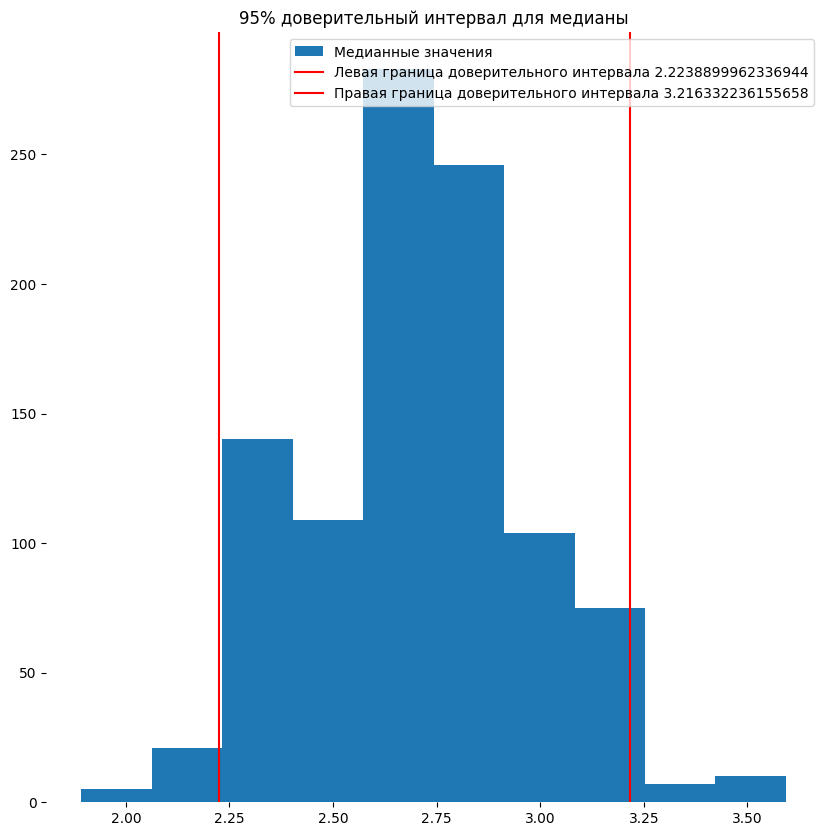

In [636]:
plt.figure(figsize = (10, 10))
plt.hist(median_samples, label = 'Медианные значения')
plt.title('95% доверительный интервал для медианы')
left_line_median = np.percentile(median_samples, 2.5)
right_line_median = np.percentile(median_samples, 97.5)
print(f'Левая граница доверительного интервала {left_line_median}')
print(f'Правая граница доверительного интервала {right_line_median}')
plt.axvline(left_line_median, color = 'red', label = f'Левая граница доверительного интервала {left_line_median}')
plt.axvline(right_line_median, color = 'red', label = f'Правая граница доверительного интервала {right_line_median}')
plt.box(False)
plt.legend(loc = 'upper right', frameon = True)
plt.show()

### Построение 95 % доверительного интервала для моды

Левая граница доверительного интервала 0.1145584960566308
Правая граница доверительного интервала 8.678732300722698


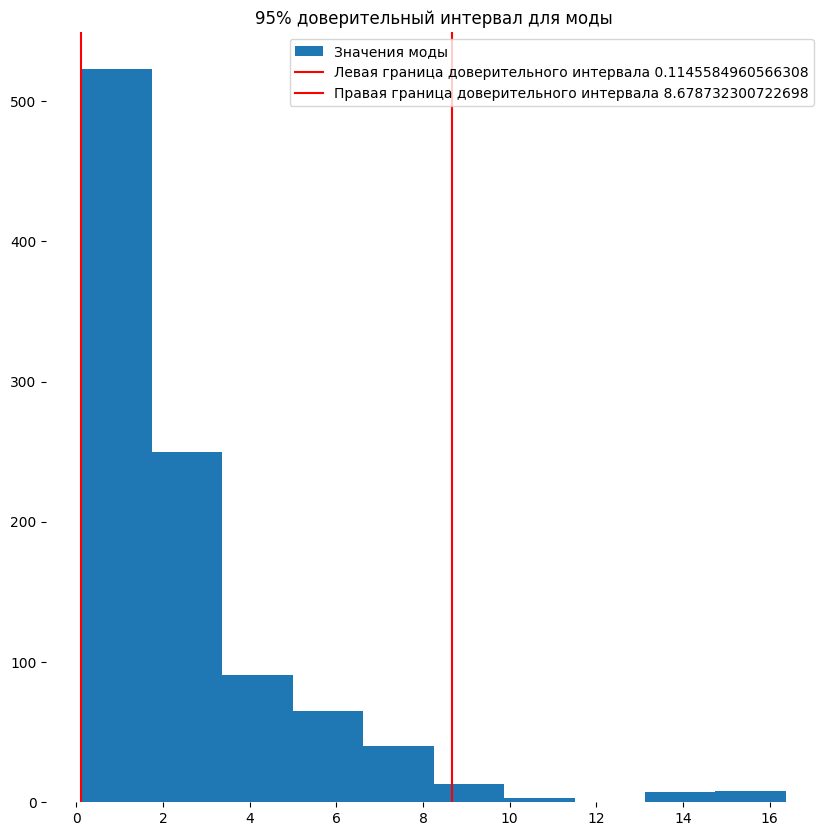

In [637]:
plt.figure(figsize = (10, 10))
plt.hist(mode_samples, label = 'Значения моды')
plt.title('95% доверительный интервал для моды')
left_line_mode = np.percentile(mode_samples, 2.5)
right_line_mode = np.percentile(mode_samples, 97.5)
print(f'Левая граница доверительного интервала {left_line_mode}')
print(f'Правая граница доверительного интервала {right_line_mode}')
plt.axvline(left_line_mode, color = 'red', label = f'Левая граница доверительного интервала {left_line_mode}')
plt.axvline(right_line_mode, color = 'red', label = f'Правая граница доверительного интервала {right_line_mode}')
plt.box(False)
plt.legend(loc = 'upper right', frameon = True)
plt.show()

### Построение 95 % доверительного интервала для дисперсии

Левая граница доверительного интервала 4.661577357834472
Правая граница доверительного интервала 12.431671608397169


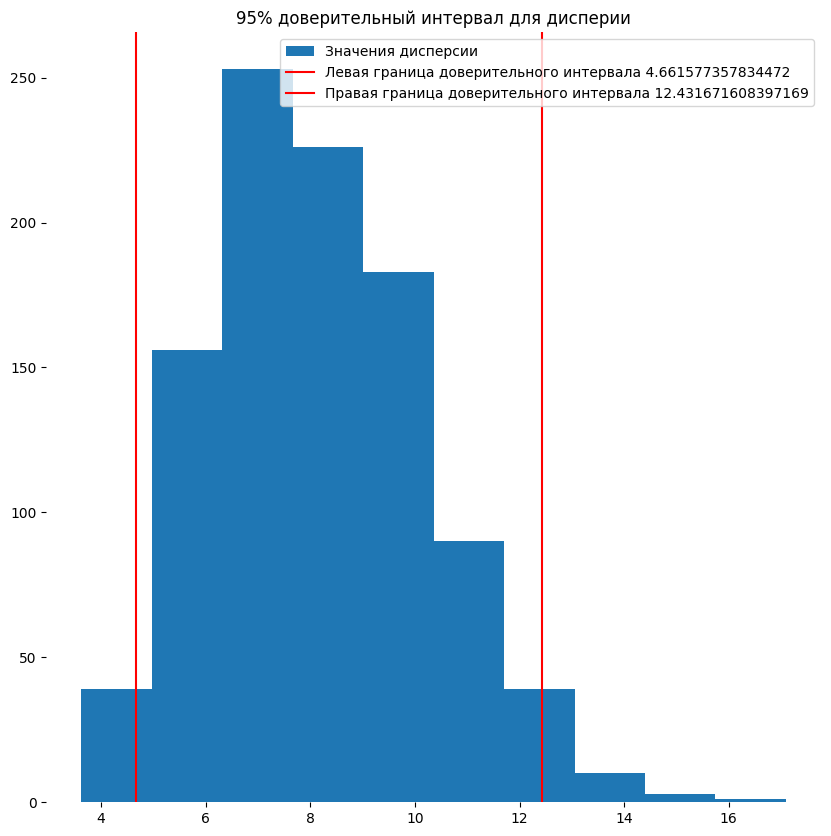

In [638]:
plt.figure(figsize = (10, 10))
plt.hist(dispersion_samples, label = 'Значения дисперсии')
plt.title('95% доверительный интервал для дисперии')
left_line_variance = np.percentile(dispersion_samples, 2.5)
right_line_variance = np.percentile(dispersion_samples, 97.5)
print(f'Левая граница доверительного интервала {left_line_variance}')
print(f'Правая граница доверительного интервала {right_line_variance}')
plt.axvline(left_line_variance, color = 'red', label = f'Левая граница доверительного интервала {left_line_variance}')
plt.axvline(right_line_variance, color = 'red', label = f'Правая граница доверительного интервала {right_line_variance}')
plt.box(False)
plt.legend(loc = 'upper right', frameon = True)
plt.show()

Когда использовать Bootstrap?

* Неизвестное распределение данных.
* Для сложных статистик (мода, медиана, квантиль).
* Маленький размер выборки или нестандартные данные.

Этот метод гибкий и работает без строгих предположений о распределении

## 6 Задание -- сводный датафрейм

In [639]:
asymptotic_intervals = {
    'Маленькая выборка': (begin_small_asympt, end_small_asympt),
    'Средняя выборка': (begin_med_asympt, end_med_asympt),
    'Большая выборка': (begin_big_asympt, end_big_asympt)
}

exact_intervals = {
    'Маленькая выборка': (begin_exact_small, end_exact_small),
    'Средняя выборка': (begin_exact_medium, end_exact_medium),
    'Большая выборка': (begin_exact_big, end_exact_big)
}

efron_intervals = {
    'Среднее': (left_line_medium, right_line_medium),
    'Медиана': (left_line_median, right_line_median),
    'Мода': (left_line_mode, right_line_mode),
    'Дисперсия': (left_line_variance, right_line_variance)
}

df_summary = pd.DataFrame({
    'Тип интервала': ['Асимптотический (ЦПТ)', 'Точный (t)', 'Эфронов (Бутстрап)'],
    'Маленькая выборка': [asymptotic_intervals['Маленькая выборка'], exact_intervals['Маленькая выборка'], '-'],
    'Средняя выборка': [asymptotic_intervals['Средняя выборка'], exact_intervals['Средняя выборка'], '-'],
    'Большая выборка': [asymptotic_intervals['Большая выборка'], exact_intervals['Большая выборка'], '-'],
    'Эфронов ДИ (Среднее)': ['-', '-', efron_intervals['Среднее']],
    'Эфронов ДИ (Медиана)': ['-', '-', efron_intervals['Медиана']],
    'Эфронов ДИ (Мода)': ['-', '-', efron_intervals['Мода']],
    'Эфронов ДИ (Дисперсия)': ['-', '-', efron_intervals['Дисперсия']]
})

df_summary


,Тип интервала,Маленькая выборка,Средняя выборка,Большая выборка,Эфронов ДИ (Среднее),Эфронов ДИ (Медиана),Эфронов ДИ (Мода),Эфронов ДИ (Дисперсия)
0,Асимптотический (ЦПТ),"(2.7279290459617282, 3.2112371516253733)","(2.9756565883495627, 3.0220319464889185)","(2.9970454196883702, 3.001845944068844)",-,-,-,-
1,Точный (t),"(2.935366599871244, 3.0037995977158576)","(2.9884618432556924, 3.0092266915827888)","(2.996047080957866, 3.002844282799348)",-,-,-,-
2,Эфронов (Бутстрап),-,-,-,"(2.8854535983597756, 3.9949329140728835)","(2.2238899962336944, 3.216332236155658)","(0.1145584960566308, 8.678732300722698)","(4.661577357834472, 12.431671608397169)"
